# **Unsupervised Learning**

---

## **What is Unsupervised Learning?**
Unsupervised learning involves training algorithms on **unlabeled data** (data without predefined labels or target variables). 

The goal is to discover hidden patterns, structures, or relationships without explicit guidance.

## **Why Use Unsupervised Learning?**
- **No Labels Required**: Ideal when labeled data is scarce or expensive.
- **Exploration**: Reveals patterns or anomalies for exploratory data analysis (EDA).
- **Dimensionality Reduction**: Simplifies high-dimensional data for visualization or modeling.
- **Versatility**: Applicable to diverse tasks (e.g., customer segmentation, feature extraction).

## **Key Types**
1. **Clustering**: Group similar data points (e.g., customer segmentation).
2. **Dimensionality Reduction**: Simplify data while retaining critical information (e.g., visualizing high-dimensional data).
3. **Association Rule Learning**: Discover relationships between variables (e.g., "customers who buy X also buy Y").
4. **Density Estimation**: Model the underlying data distribution (e.g., anomaly detection).

---

## **Core Techniques and Algorithms**

### **A. Clustering**
Partitions data into groups based on similarity.

**Methods**:
- **K-Means**: Divides data into \( K \) clusters by minimizing intra-cluster variance.
  - *Example*: Segmenting retail customers into groups based on purchase history.
- **DBSCAN**: Density-based clustering; identifies outliers as noise.
  - *Example*: Detecting fraudulent transactions in finance.
- **Hierarchical Clustering**: Builds a tree of clusters (agglomerative or divisive).
  - *Example*: Taxonomy creation in biology.
- **Gaussian Mixture Models (GMM)**: Soft clustering using probabilistic assignments.
  - *Example*: Image compression.

### **B. Dimensionality Reduction**
Reduces feature count while preserving structure.

**Methods**:
- **Principal Component Analysis (PCA)**: Linear projection onto orthogonal axes of maximum variance.
  - *Example*: Simplifying facial recognition data.
- **t-SNE**: Non-linear technique for visualization, preserves local structures.
  - *Example*: Visualizing word embeddings in NLP.
- **Autoencoders**: Neural networks that compress data into a latent space.
  - *Example*: Anomaly detection in manufacturing.

### **C. Association Rule Learning**
Finds co-occurrence patterns in transactional data.
**Methods**:
- **Apriori Algorithm**: Identifies frequent itemsets using support and confidence.
  - *Example*: Market basket analysis (e.g., "diapers → beer").
- **Metrics**:
  - *Support*: Frequency of an itemset.
  - *Confidence*: Likelihood of Y given X.
  - *Lift*: Measures independence between items.

### **D. Density Estimation**
Models the probability distribution of data.
- **Kernel Density Estimation (KDE)**: Non-parametric approach.
  - *Example*: Estimating population distribution.
- **GMM**: Parametric method using Gaussian components.
  - *Example*: Speech recognition.

---

## **Applications**
- **Market Segmentation**: Clustering customers for targeted marketing.
- **Anomaly Detection**: Identifying outliers in network security.
- **Recommendation Systems**: Collaborative filtering using association rules.
- **Feature Engineering**: Reducing dimensions before supervised learning.
- **Generative Models**: Creating synthetic data (e.g., GANs for art generation).

---

## **Challenges**
- **Evaluation Difficulty**: Lack of labels makes validation subjective.
- **Curse of Dimensionality**: High-dimensional data sparsity complicates analysis.
- **Interpretability**: Complex patterns may be hard to explain.
- **Parameter Sensitivity**: Results depend on hyperparameters (e.g., \( K \) in K-means).

---

## **Evaluation Methods**

### **Clustering:**
- *Silhouette Score*: Measures cluster cohesion and separation.
- *Davies-Bouldin Index*: Lower values indicate better clustering.

### **Dimensionality Reduction:**
- *Reconstruction Error* (Autoencoders): How well data is rebuilt.
- *Downstream Task Performance*: Impact on classification accuracy.

### **Association Rules:**
- *Lift* and *Conviction*: Assess rule usefulness.

---

## **Practical Examples**

### **Example 1: K-Means Clustering**

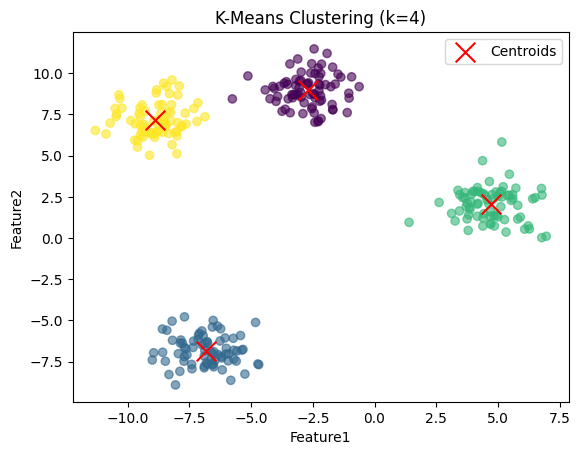

Cluster Labels: [3 3 0 1 3 1 2 1 0 2]


In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1, random_state=42)
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])

# Fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c="red", marker="x", s=200, label="Centroids")
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

# Cluster assignments
print("Cluster Labels:", kmeans.labels_[:10])

### **Example 2: DBSCAN Clustering**

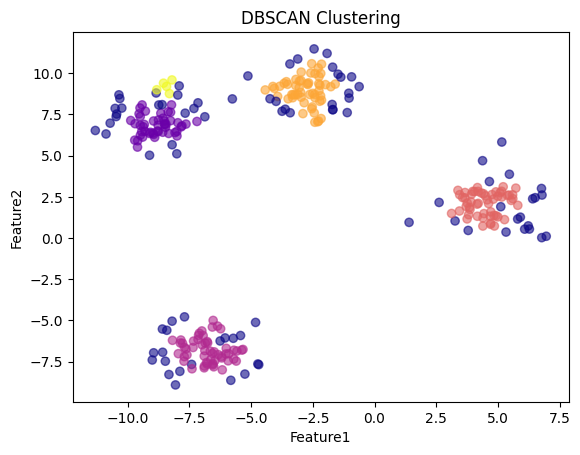

Cluster Labels (including noise): [ 0  0 -1  1 -1  1  2  1  3  2]


In [2]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="plasma", alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# Labels: -1 indicates noise
print("Cluster Labels (including noise):", dbscan.labels_[:10])

### **Example 3: Principal Component Analysis (PCA)**

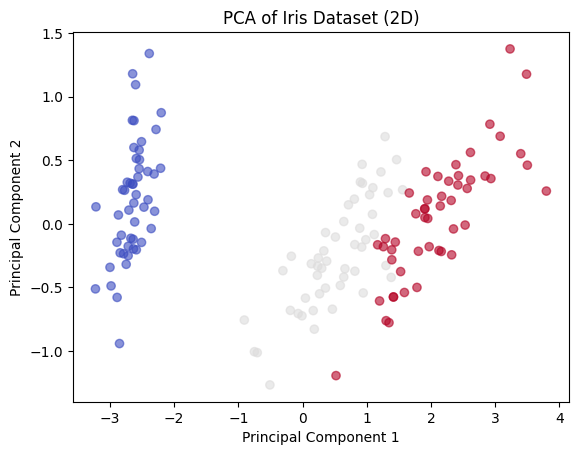

Explained Variance Ratio: [0.92461872 0.05306648]


In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap="coolwarm", alpha=0.6)
plt.title("PCA of Iris Dataset (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# Output: e.g., [0.924, 0.053]

### **Example 4: t-SNE Visualization**

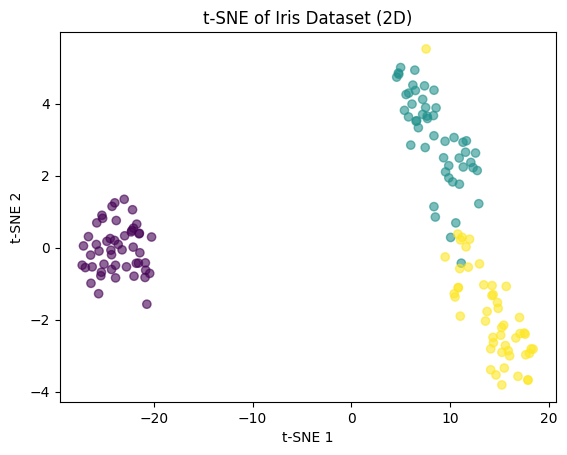

In [4]:
from sklearn.manifold import TSNE

# Fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap="viridis", alpha=0.6)
plt.title("t-SNE of Iris Dataset (2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

---

## **Tools and Methods Summary**
- **Clustering**: `sklearn.cluster.KMeans`, `DBSCAN`.
- **Dimensionality Reduction**: `sklearn.decomposition.PCA`, `sklearn.manifold.TSNE`.
- **Evaluation**: `sklearn.metrics.silhouette_score`, `.inertia_` (WCSS for K-Means).
- **Visualization**: `matplotlib.pyplot.scatter()`, `seaborn.scatterplot()`.

In [5]:
from sklearn.metrics import silhouette_score

# Evaluate K-Means
silhouette = silhouette_score(X, kmeans.labels_)
print("Silhouette Score for K-Means:", silhouette)

ValueError: Found input variables with inconsistent numbers of samples: [150, 300]

---